In [1]:
import sqlite3

# Connect to SQLite database file (it will be created if it doesn't exist)
conn = sqlite3.connect('sales_data.db')

# Create a cursor object
cur = conn.cursor()

# Create a sales table
cur.execute('''
CREATE TABLE IF NOT EXISTS sales (
    Sales_Person TEXT,
    Country TEXT,
    Product TEXT,
    Date TEXT,
    Revenue REAL,
    Quantity INTEGER
)
''')

# Insert sample data
sample_data = [
    ('Jehu Rudeforth', 'UK', 'Mint Chip Choco', '2022-01-04', 5320.0, 180),
    ('Van Tuxwell', 'India', '85% Dark Bars', '2022-08-01', 7896.0, 94),
    ('Gigi Bohling', 'India', 'Peanut Butter Cubes', '2022-07-07', 4501.0, 91),
    ('Jan Morforth', 'Australia', 'Peanut Butter Cubes', '2022-04-27', 12726.0, 342),
    ('Jehu Rudeforth', 'UK', 'Peanut Butter Cubes', '2022-02-24', 13685.0, 184)
]

cur.executemany('''
INSERT INTO sales (Sales_Person, Country, Product, Date, Revenue, Quantity)
VALUES (?, ?, ?, ?, ?, ?)
''', sample_data)

# Commit changes and close the connection
conn.commit()
conn.close()

print("Database 'sales_data.db' created successfully with 'sales' table and sample data!")


Database 'sales_data.db' created successfully with 'sales' table and sample data!


In [6]:
import sqlite3
import pandas as pd

# Connect to the existing database
conn = sqlite3.connect('sales_data.db')

# Read entire sales table into a pandas DataFrame
df = pd.read_sql_query("SELECT * FROM sales", conn)

# Display the whole DataFrame
print(df)

# Close the connection
conn.close()


     Sales_Person    Country              Product        Date  Revenue  \
0  Jehu Rudeforth         UK      Mint Chip Choco  2022-01-04   5320.0   
1     Van Tuxwell      India        85% Dark Bars  2022-08-01   7896.0   
2    Gigi Bohling      India  Peanut Butter Cubes  2022-07-07   4501.0   
3    Jan Morforth  Australia  Peanut Butter Cubes  2022-04-27  12726.0   
4  Jehu Rudeforth         UK  Peanut Butter Cubes  2022-02-24  13685.0   

   Quantity  
0       180  
1        94  
2        91  
3       342  
4       184  


In [9]:
# Connect to the existing database
conn = sqlite3.connect('sales_data.db')

# Query the database
query = '''
SELECT Product, sum(Quantity)as Total_qty, sum(Quantity * Revenue) AS Total_Revenue
FROM sales
group by Product
'''
result_df = pd.read_sql_query(query, conn)

# Display the result
print(result_df)

# Close the connection
conn.close()

               Product  Total_qty  Total_Revenue
0        85% Dark Bars         94       742224.0
1      Mint Chip Choco        180       957600.0
2  Peanut Butter Cubes        617      7279923.0


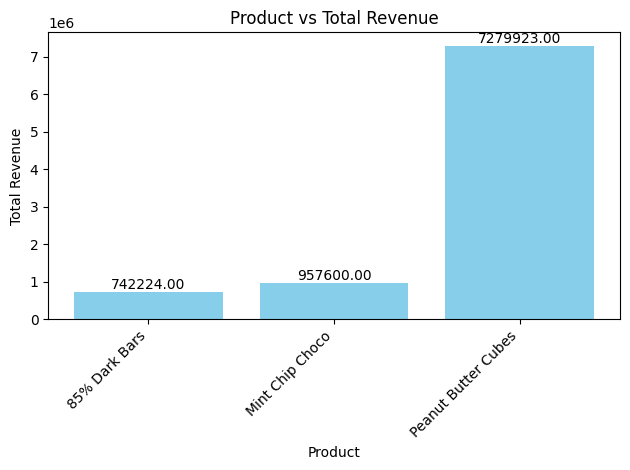

In [ ]:
import matplotlib.pyplot as plt
# Adding data labels to the bar chart
for i, value in enumerate(result_df['Total_Revenue']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
# Plotting the bar chart
plt.bar(result_df['Product'], result_df['Total_Revenue'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Product vs Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show the plot
plt.savefig('product_vs_total_revenue.png')
plt.show()